In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from obspy.taup import TauPyModel
import function_repo as fr
import importlib
importlib.reload(fr)

<module 'function_repo' from 'c:\\Users\\18723\\Documents\\GitHub\\SURG-Mars\\function_repo.py'>

In [338]:
# load normal-fault-guess.csv as a dataframe
df = pd.read_csv("normal_fault_guess.csv")
df.head()

,Theta,Phi,Alpha,tx,ty,tz,px,py,pz,Strike1,Dip1,Rake1,Strike2,Dip2,Rake2,OldWeight,Weight
0,250.463964,66.813744,83.713264,-0.307390,-0.866311,0.393721,-0.194994,0.462318,0.865008,141.195486,27.119697,-46.974522,274.835444,70.533845,-109.262408,0.141749,0.316497
1,250.463964,66.813744,88.244268,-0.307390,-0.866311,0.393721,-0.267963,0.475814,0.837733,145.834939,29.451773,-39.682956,271.682660,71.701735,-113.487746,0.984501,0.966151
2,250.463964,66.813744,92.361235,-0.307390,-0.866311,0.393721,-0.332824,0.485499,0.808405,149.254998,31.784876,-33.827127,268.922120,72.948833,-117.237839,0.166219,0.225846
3,218.830488,74.611887,48.255083,-0.751077,-0.604540,0.265356,-0.033908,-0.366072,-0.929969,308.964333,61.968814,-106.754109,161.607330,32.304242,-61.567276,0.538554,0.396274
4,218.830488,74.611887,48.296442,-0.751077,-0.604540,0.265356,-0.033433,-0.366582,-0.929785,308.932612,61.977255,-106.798259,161.655427,32.318182,-61.497381,0.549811,0.400941


In [339]:
# weight is np.exp(-angle**2/(2*epsilon**2))

old_accepted1 = df["OldWeight"] >= np.exp(-1/2)
old_accepted2 = (df["OldWeight"] >= np.exp(-2)) & (df["OldWeight"] < np.exp(-1/2))
old_rejected = df["OldWeight"] < np.exp(-2)
accepted1 = df["Weight"] >= np.exp(-1/2)
accepted2 = (df["Weight"] >= np.exp(-2)) & (df["Weight"] < np.exp(-1/2))
rejected = df["Weight"] < np.exp(-2)

if len(df[rejected]) == 0:
    print("No rejected solutions")

No rejected solutions


In [340]:
# Plot the accepted and rejected guesses in 3D scatter plot
# Then plot pairwaise scatter plot of the accepted guesses
# Then beachballs of the accepted guesses, accounting for weight

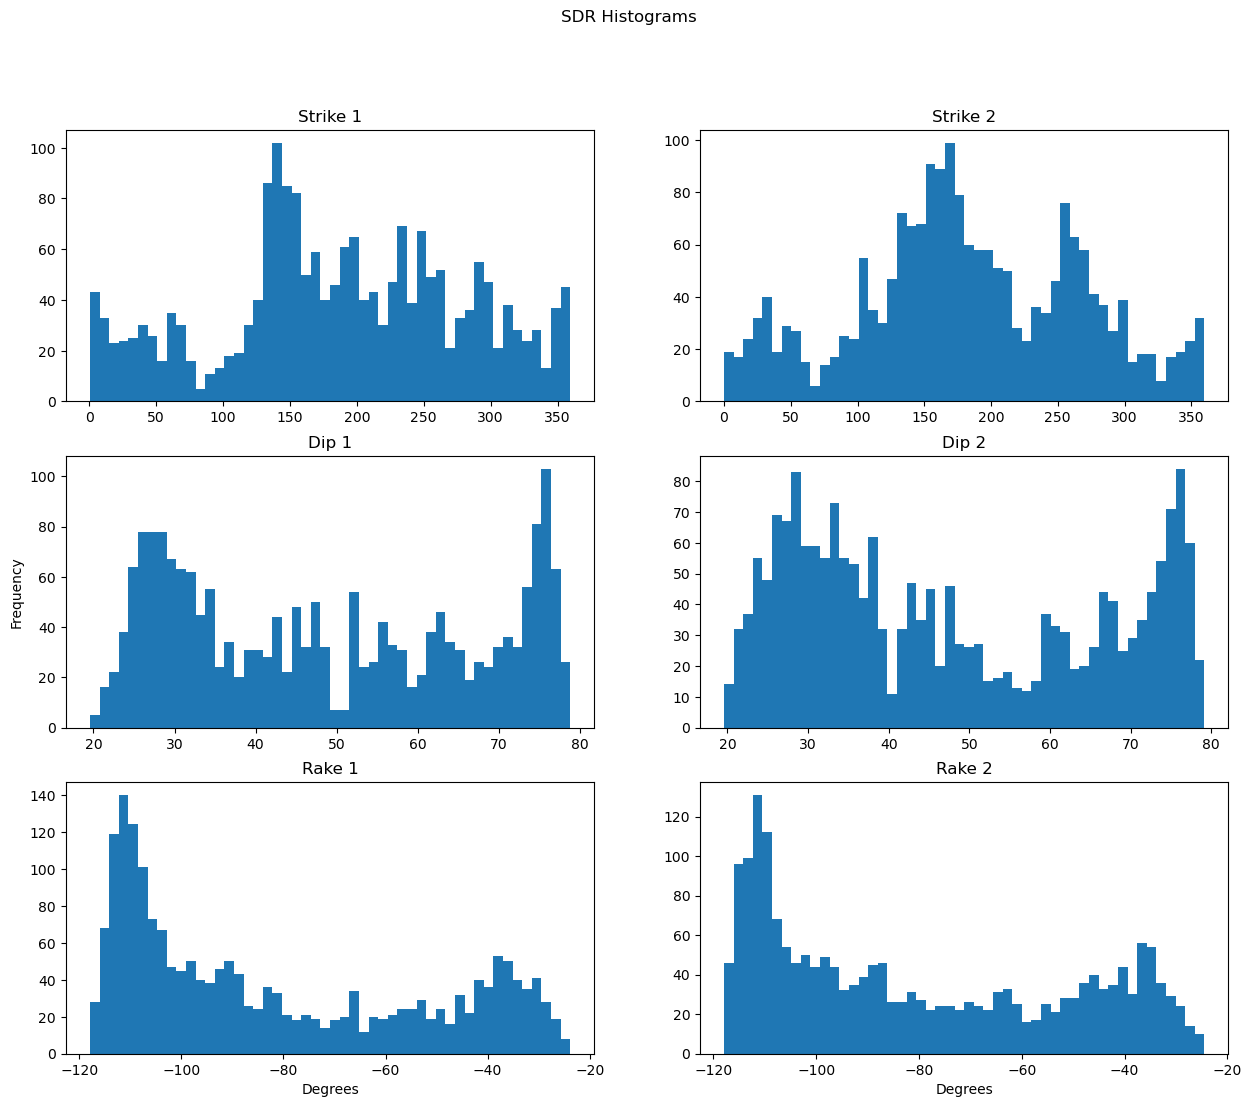

In [341]:
# histogram (sanity check)
fr.sdr_histograms(df)
# overlay histograms of accepted/rejected guesses

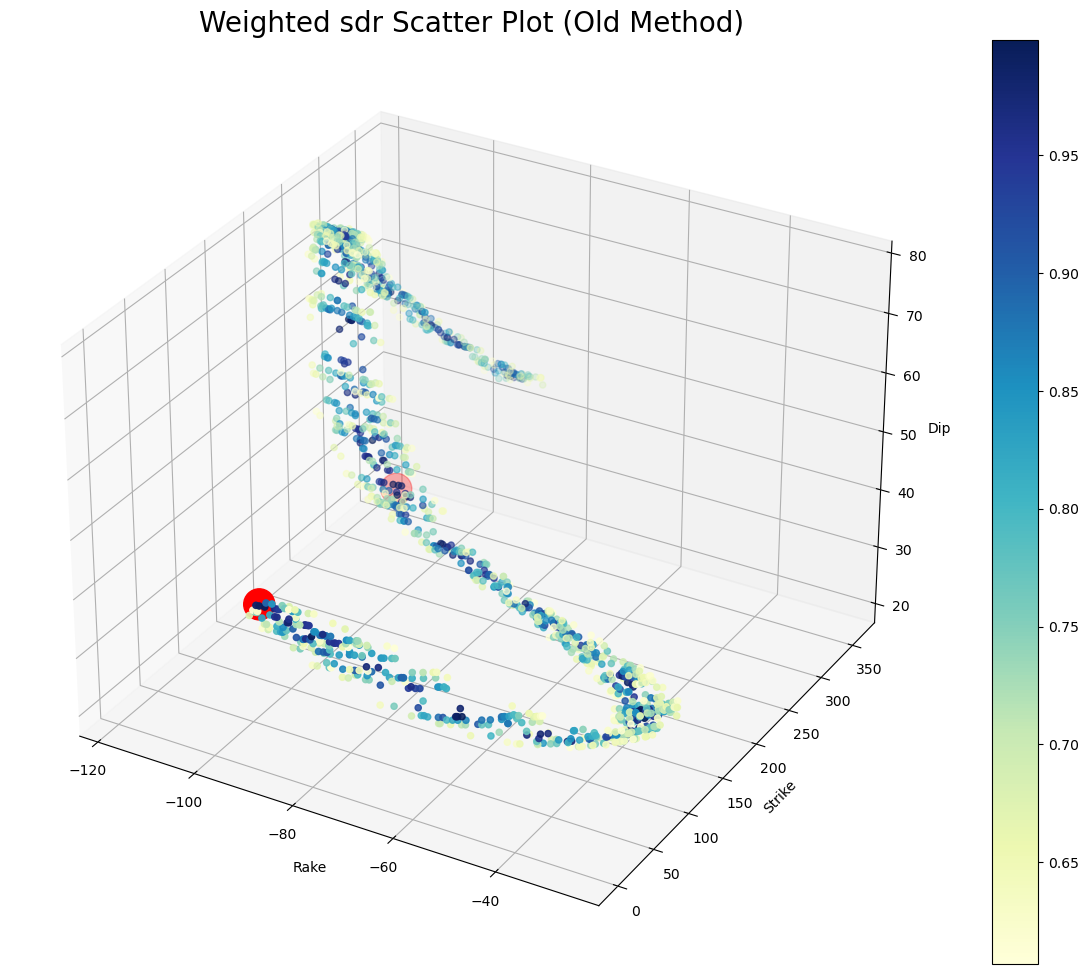

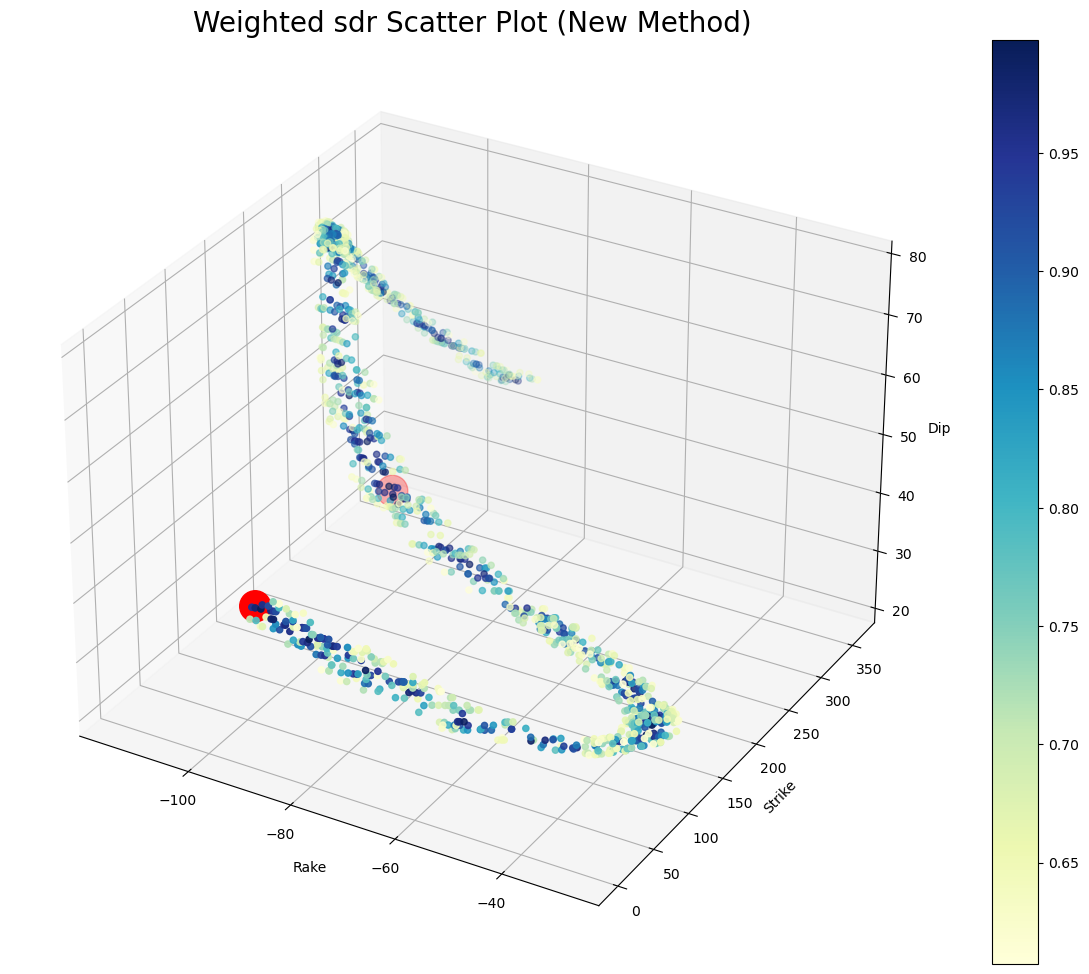

In [342]:
# 3D sdr scatter plot

# Ao = np.array([-0.81021954, -4.91714978, 2.19851802])
# Uo = np.array([0.02231451, 0.13542476, 0.06055007])
t, p = np.array([1,0,0]), np.array([0,0,1])
normal_faults = fr.tp2sdr(fr.coord_switch(t), fr.coord_switch(p))
normal_faults = np.rad2deg(np.array(normal_faults))

fr.weighted_3D_scatter(df[old_accepted1], "OldWeight", normal_faults)
fr.weighted_3D_scatter(df[accepted1], "Weight", normal_faults)

In [343]:
# Explain the S-shape
# The red circles seem to be in the middle of the paths they came from
# Compare with weighted average

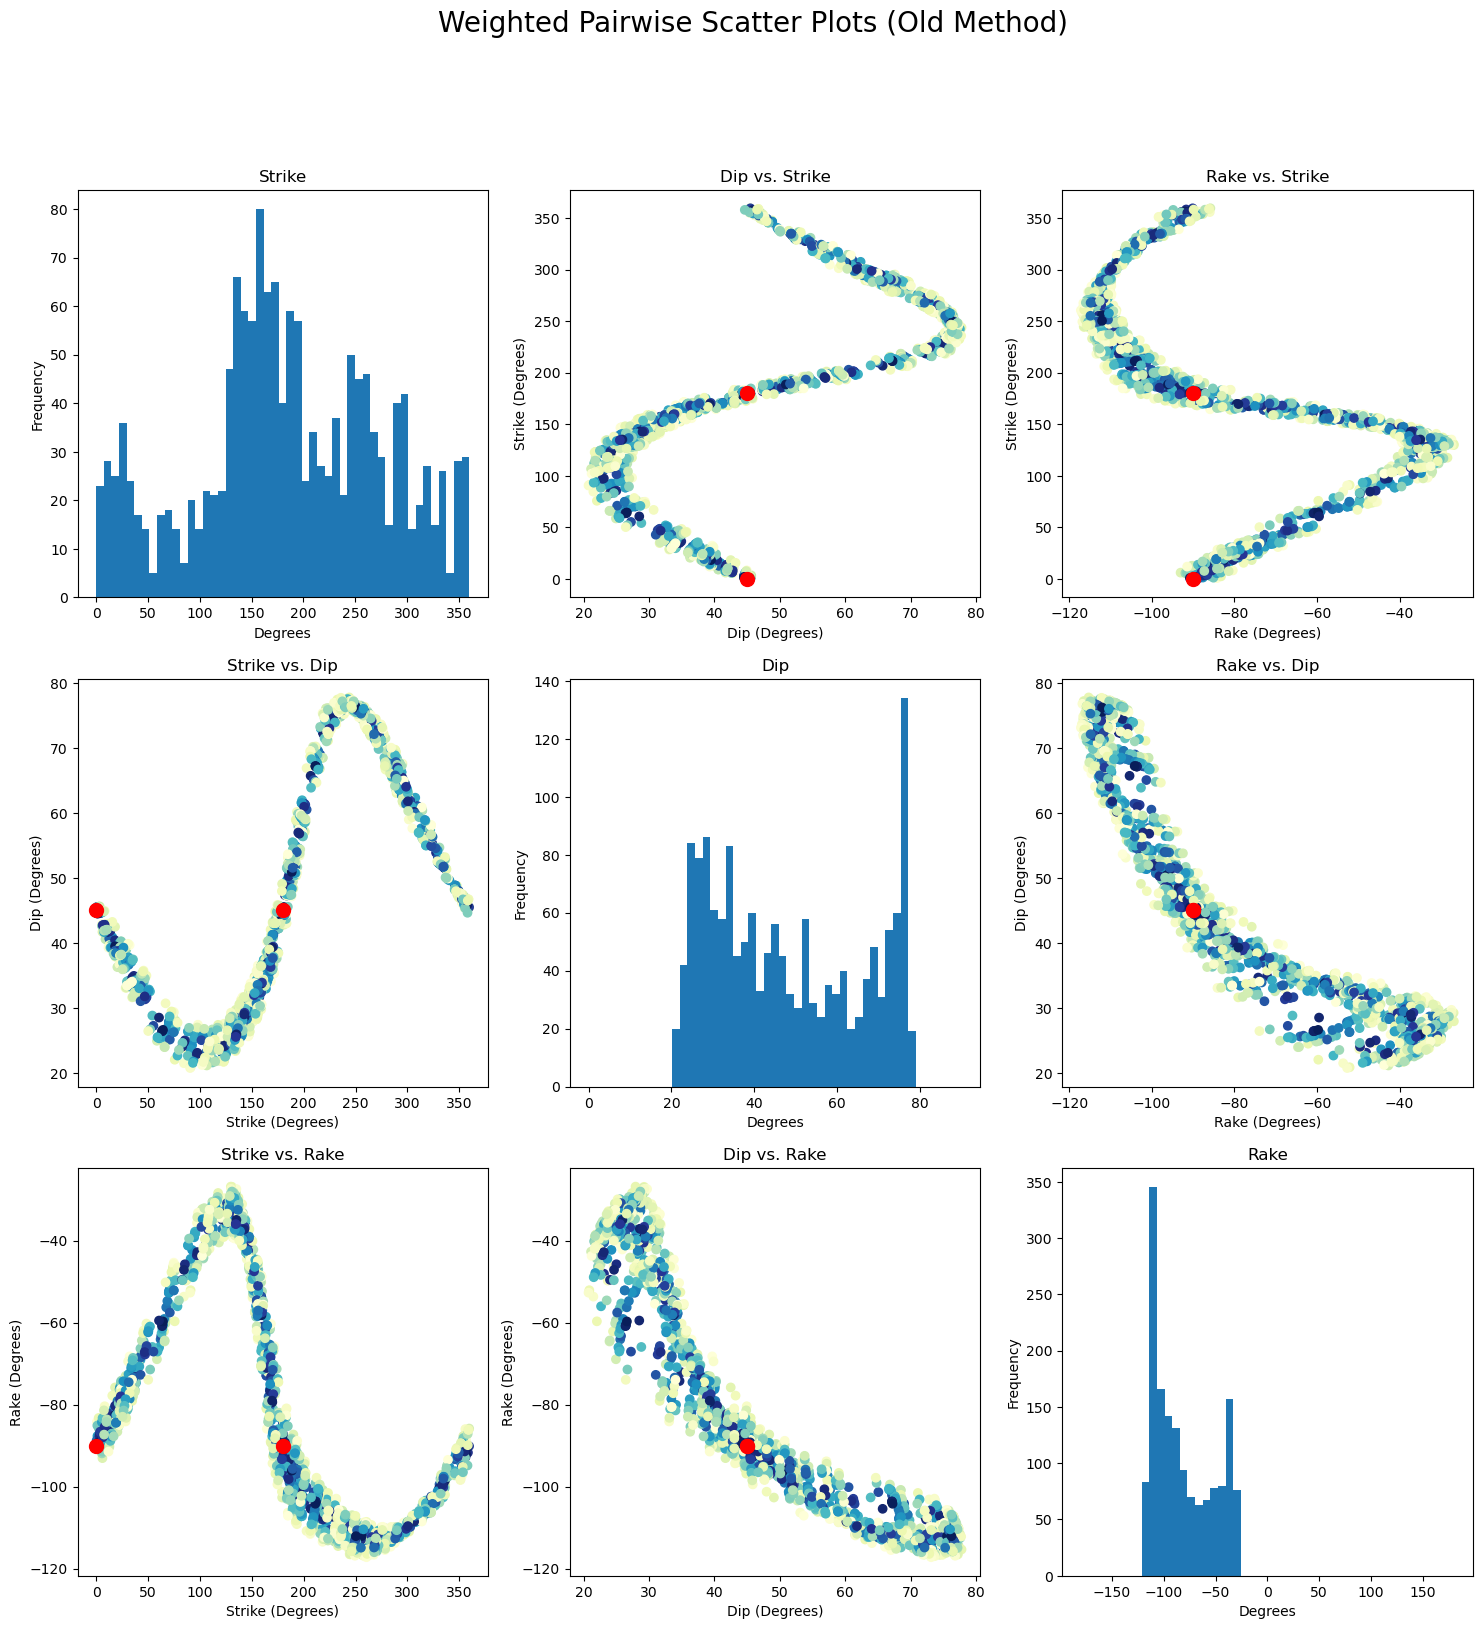

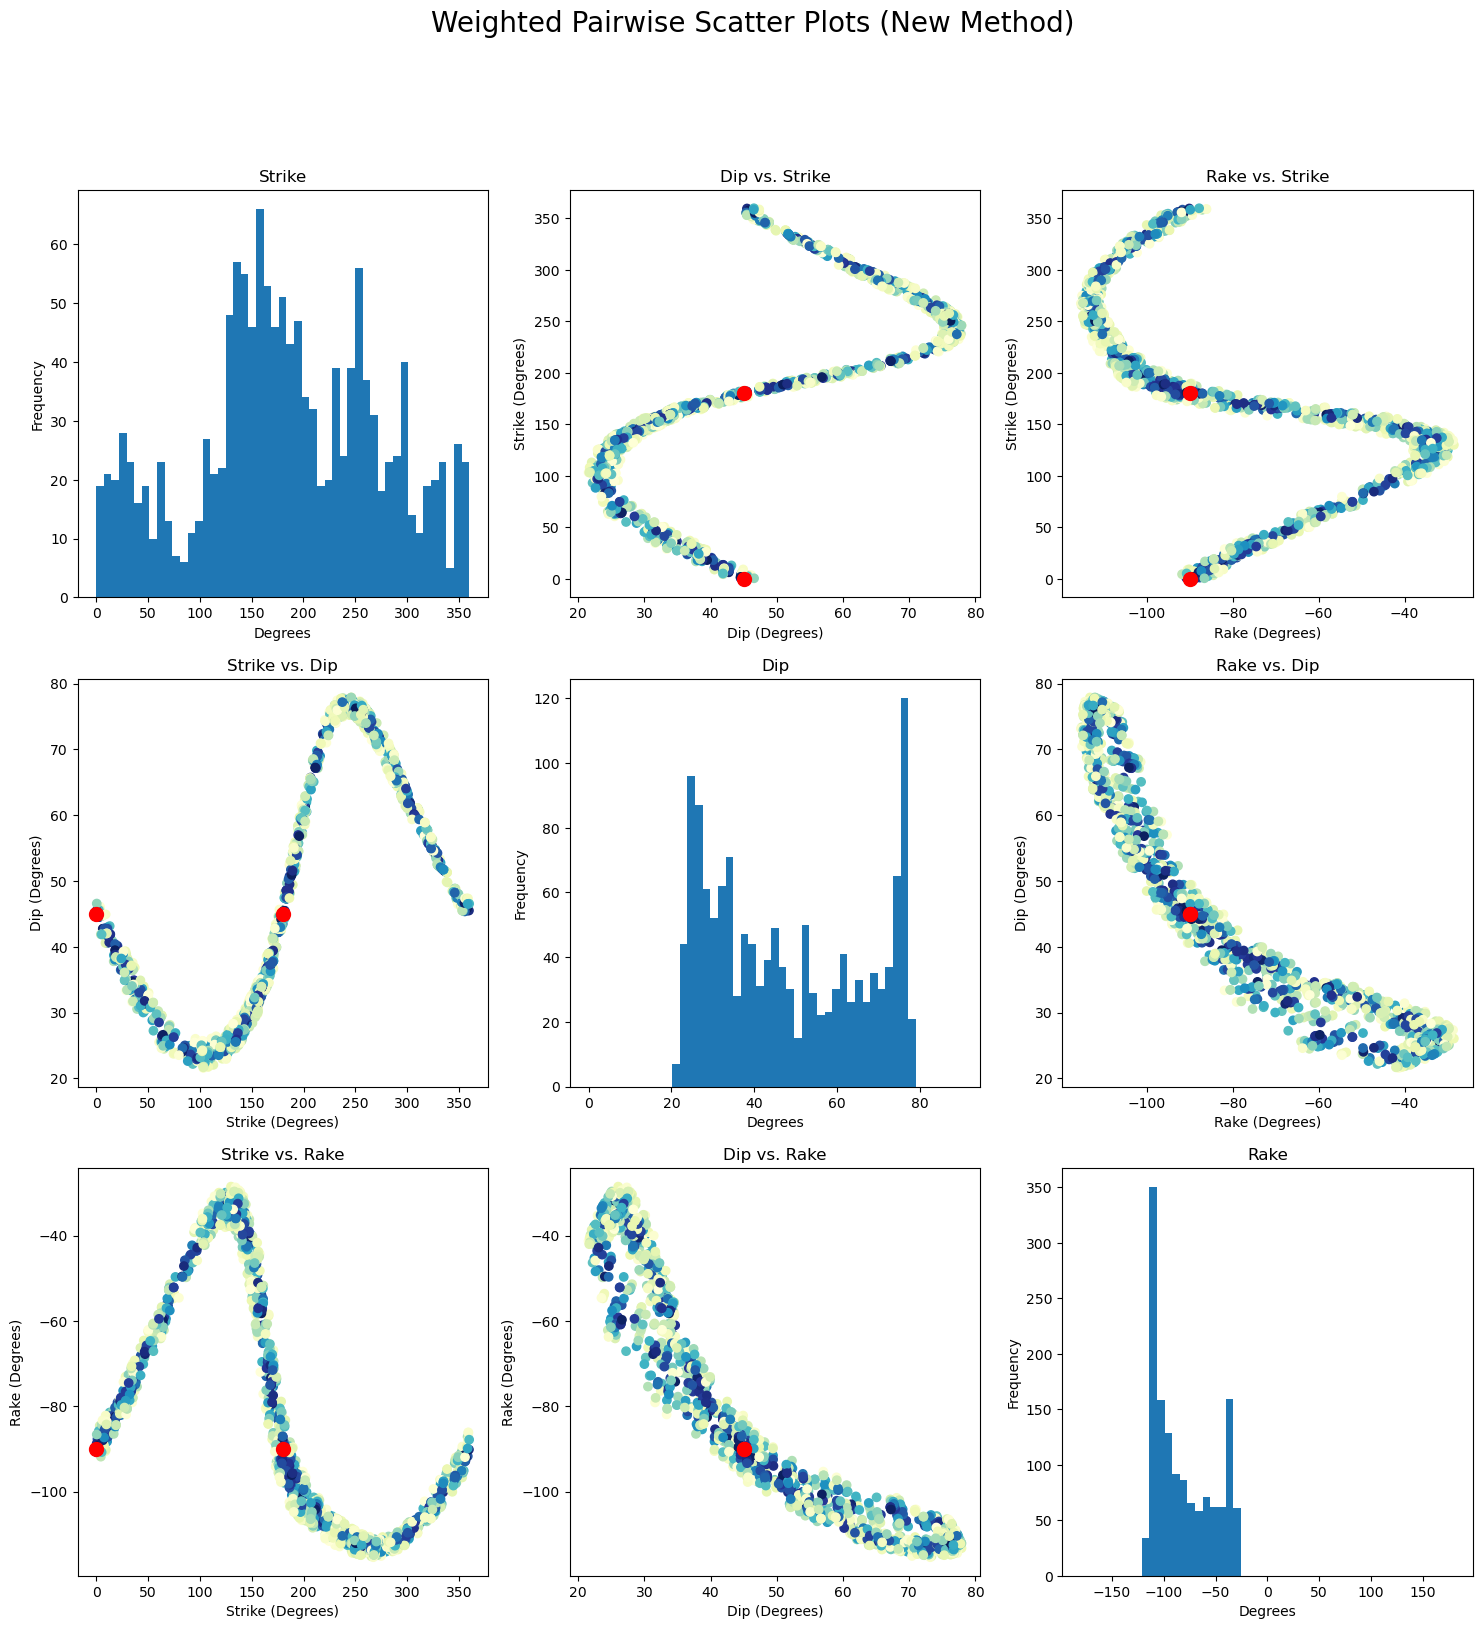

In [344]:
# Grid of pairwise scatter plots

fr.weighted_pairwise_scatter(df[old_accepted1], "OldWeight", true_sol = normal_faults)
fr.weighted_pairwise_scatter(df[accepted1], "Weight", true_sol = normal_faults)

# marker for true soln in histogram

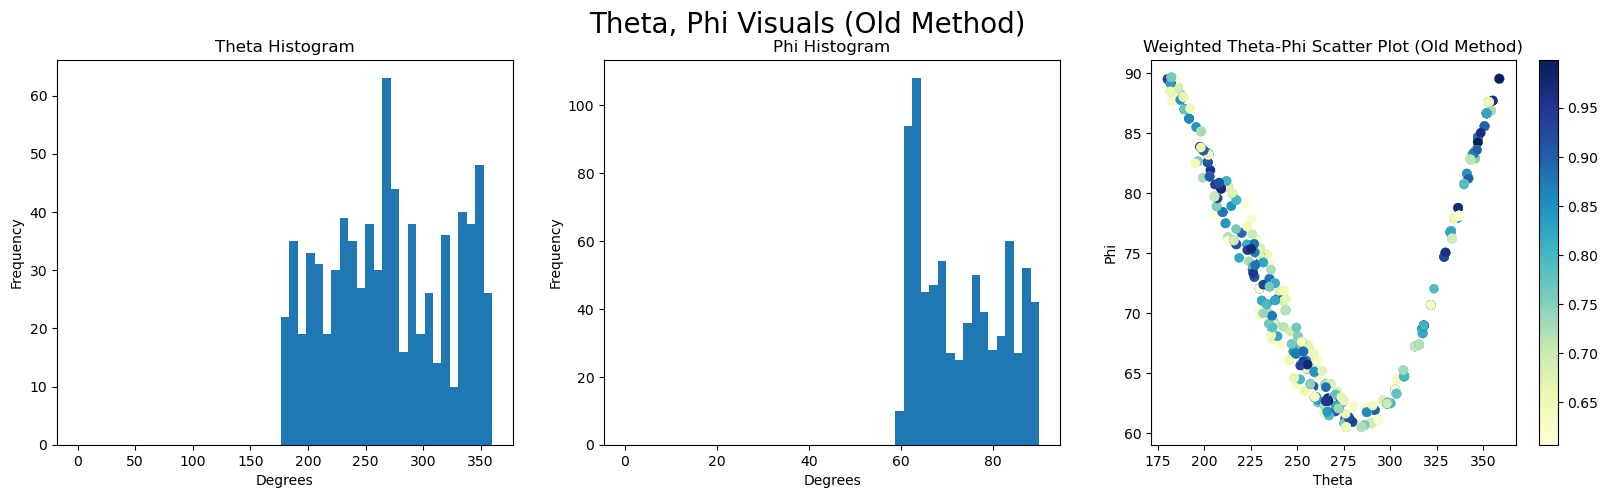

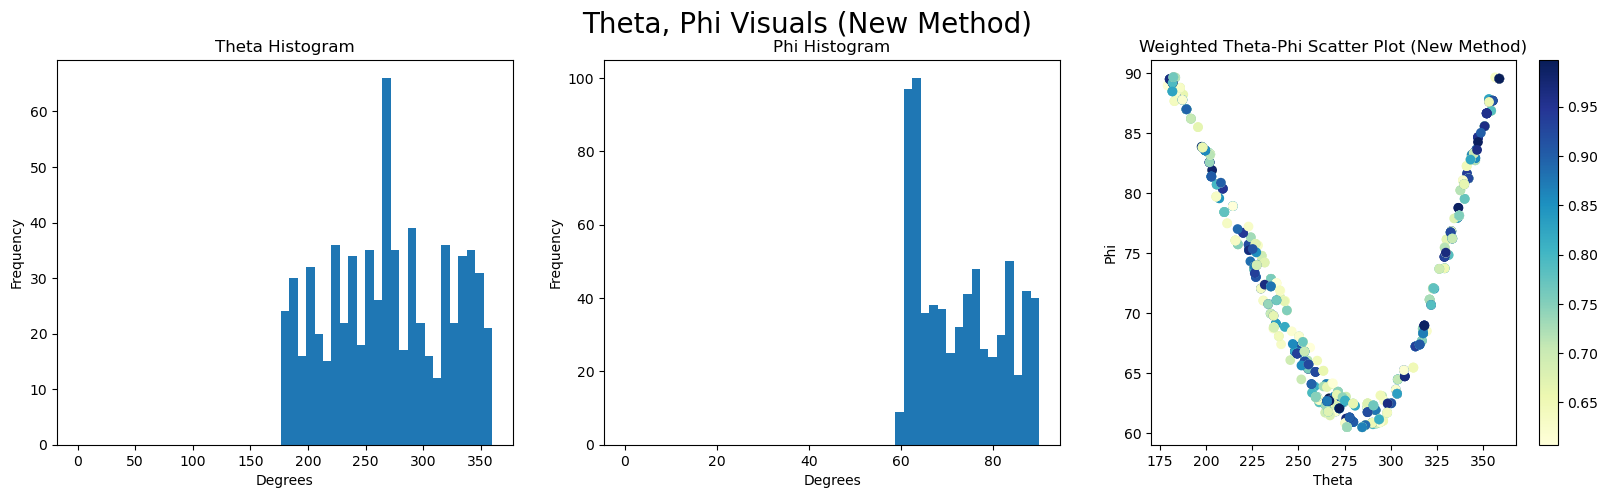

In [345]:
# grid of pairwise scatter plots
fr.weighted_pairwise_scatter(df[old_accepted1], "OldWeight", type="tp")
fr.weighted_pairwise_scatter(df[accepted1], "Weight", type="tp")

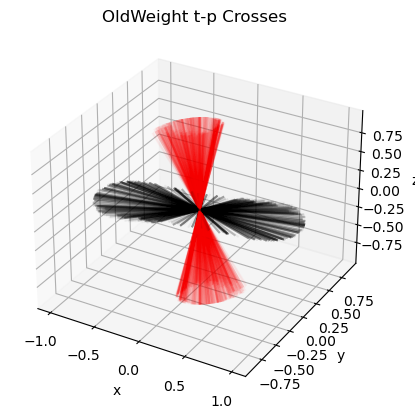

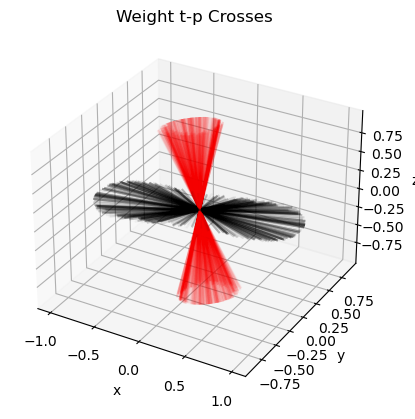

In [346]:
# TP CROSSES

fr.plot_crosses(df[old_accepted1], "OldWeight")
fr.plot_crosses(df[accepted1], "Weight")

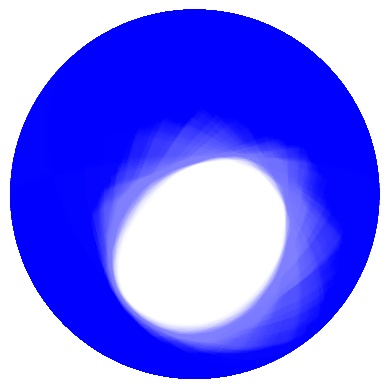

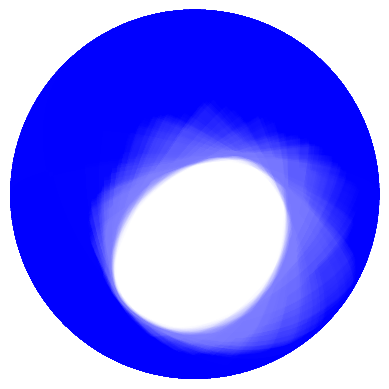

In [347]:
# COMPLETE SOLUTION SETS

fr.plot_beachball_set(df[old_accepted1], "OldWeight")
fr.plot_beachball_set(df[accepted1], "Weight")

Original: [  0.  45. -90.]


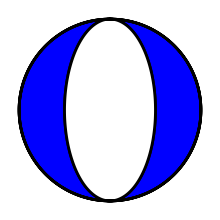

Old SDR (1 stdev): [188.69874535  49.42123306 -83.54493757]


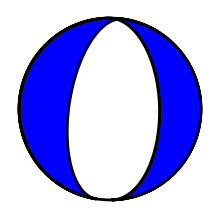

SDR (1 stdev): [189.34377952  49.44340185 -83.73051357]


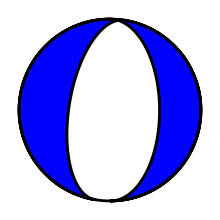

Old SDR (2 stdevs): [188.05913686  48.85455316 -81.06002706]


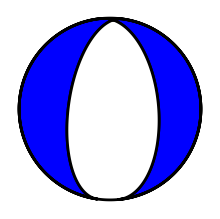

SDR (2 stdevs): [186.51775326  48.39149505 -80.82533387]


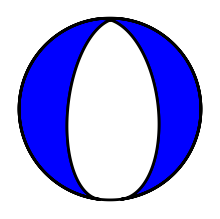

In [348]:
# AGGREGATE BEACHBALLS

print(f"Original: {normal_faults[0]}")
fr.beachball(normal_faults[0]);

old_sdr_1s = fr.aggregate_sdr(df[old_accepted1], "OldWeight")[0]
print(f"Old SDR (1 stdev): {old_sdr_1s}")
fr.beachball(old_sdr_1s);
sdr_1s = fr.aggregate_sdr(df[accepted1], "Weight")[0]
print(f"SDR (1 stdev): {sdr_1s}")
fr.beachball(sdr_1s);

old_sdr_2s = fr.aggregate_sdr(df[old_accepted2], "OldWeight")[0]
print(f"Old SDR (2 stdevs): {old_sdr_2s}")
fr.beachball(old_sdr_2s);
sdr_2s = fr.aggregate_sdr(df[accepted2], "Weight")[0]
print(f"SDR (2 stdevs): {sdr_2s}")
fr.beachball(sdr_2s);

In [349]:
# AGGREGATE MISFIT ANGLES

model = TauPyModel(model='ak135') # velocity model
hdepth = 15 # km - assumed quake depth
epdist = 10
b3_over_a3 = (3.4600/5.8000)**3
azimuth = 200

t, p = np.array([1,0,0]), np.array([0,0,1])
faults = fr.tp2sdr(fr.coord_switch(t), fr.coord_switch(p))
faults = np.rad2deg(np.array(faults))
arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['P', 'S'])
takeoff_angles = [a.takeoff_angle for a in arrivals]
Ao = np.array(fr.Rpattern(faults[0], azimuth, takeoff_angles))
Ao[0] *= b3_over_a3

old_As1 = np.array(fr.Rpattern(old_sdr_1s, azimuth, takeoff_angles))
old_As1[0] *= b3_over_a3
old_angle_1s = np.arccos(np.dot(old_As1, Ao)/(np.linalg.norm(old_As1)*np.linalg.norm(Ao)))
print(f"Old angle (1 stdev): {np.rad2deg(old_angle_1s): .3f} degrees, sample size: {len(df[old_accepted1])}")

As1 = np.array(fr.Rpattern(sdr_1s, azimuth, takeoff_angles))
As1[0] *= b3_over_a3
angle_1s = np.arccos(np.dot(As1, Ao)/(np.linalg.norm(As1)*np.linalg.norm(Ao)))
print(f"New angle (1 stdev): {np.rad2deg(angle_1s): .3f} degrees, sample size: {len(df[accepted1])}")

old_As2 = np.array(fr.Rpattern(old_sdr_2s, azimuth, takeoff_angles))
old_As2[0] *= b3_over_a3
old_angle_2s = np.arccos(np.dot(old_As2, Ao)/(np.linalg.norm(old_As2)*np.linalg.norm(Ao)))
print(f"Old angle (2 stdevs): {np.rad2deg(old_angle_2s): .3f} degrees, sample size: {len(df[old_accepted2])}")

As2 = np.array(fr.Rpattern(sdr_2s, azimuth, takeoff_angles))
As2[0] *= b3_over_a3
angle_2s = np.arccos(np.dot(As2, Ao)/(np.linalg.norm(As2)*np.linalg.norm(Ao)))
print(f"New angle (2 stdevs): {np.rad2deg(angle_2s): .3f} degrees, sample size: {len(df[accepted2])}")

Old angle (1 stdev):  6.471 degrees, sample size: 776
New angle (1 stdev):  5.937 degrees, sample size: 694
Old angle (2 stdevs):  7.432 degrees, sample size: 1199
New angle (2 stdevs):  7.657 degrees, sample size: 1281


In [350]:
# Try Kagan angles <<<<

# Look at more source mechanisms, maybe it's better over the entire space
# What if it depends on how many solutions are accepted?
# Try comparing an equal number of solutions, just weighted differently
# What if we got aggregate of the whole thing? (efficiency tradeoff)
# New dataframe with the info from previous cell, look at research papers
# Make a function that returns final dataframe given all input parameters

In [351]:
# beachballs, consider weight
# omkar's code (GitHub)
# proper labelling of previous graphs

# amplitude space (generate data, plot) categorizing breadth vs depth
# consider smaller errors, see how close you can get
# sensitivity analysis of errors**
# overlay histograms of accepted/rejected guesses
# tp crosses on sphere
# collapsing dimensions in space
# same mechanism, different azimuths/epicentral depths
# map from sdr to amplitudes
# in what ways can I visualize parts of this data?
# what variables to vary?
    # azimuth, epicentral depth, takeoff angle, amplitude, uncertainty
# coarse subdivisions of space
# KEEP THE BALL MOVING!

# fix b3_over_a3 in fr.apply_inverse_methods (just notational)

# working with seeds

# STATISTICAL METHODS
# 1. Hypothesis testing
# 2. Inference from samples
# 3. Estimation of parameters
# 4. Predictive regression/methods
# 5. Potential machine learning methods
# 6. Collapsing dimensions in space
# 7. Sensitivity analysis of errors - how close can I get?

# GET RELEVANT PAPERS, ASK SUZAN AS WELL
# 1. Maddy's paper
# 2. The one I used for ellipsoidal projections
# 3. Matthew Plumlee - uncertainty quantification, model calibration, large scale simulations
# 4. Elliptical slice sampling, learn more about it
# 5. Textbooks (statistical methods)

# I NEED A SYSTEM FOR GETTING FROM HERE TO A FIRST DRAFT

### Model comparisons

* What metrics can we use?
* Different ways of weighting
* Are s,d,r dependent?
* If not, to what extent does ... account for the dependencies?